In [1]:
import pandas as pd
import os
import torch
from typing import Union, Optional, List

import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from nextorch.plotting import add_x_slice_2d, add_y_slice_2d, add_z_slice_2d, colormap, set_axis_values, figformat, backgroundtransparency
from nextorch.utils import unitscale_xv, MatrixLike2d, tensor_to_np

In [28]:
def pareto_front(
    y1: MatrixLike2d, 
    y2: MatrixLike2d, 
    Y_names: Optional[List[str]] = None, 
    fill: Optional[bool] = True,
    diagonal: Optional[bool] = True,
    save_fig: Optional[bool] = False,
    save_path: Optional[str] = None, 
    i_iter: Optional[Union[str, int]] = ''):
    """Plot parity plot comparing the ground true 
    objective function values against predicted model mean

    Parameters
    ----------
    y1 : MatrixLike2d
        Ground truth values
    y2 : MatrixLike2d
        Model predicted values
    fill: Optional[bool], optional
        if true fill the space enclosed by the points 
        by default True 
    diagonal: Optional[bool], optional
        if true plot the y = x line
        by default True 
    save_fig: Optional[bool], optional
        if true save the plot 
        by default False
    save_path: Optional[str], optional
        Path where the figure is being saved
        by default the current directory
    i_iter: Optional[Union[str, int]], optional
        Iteration number to add to the figure name
        by default ''
    """
    y1 = np.squeeze(tensor_to_np(y1))
    y2 = np.squeeze(tensor_to_np(y2))
    # Set default axis names 
    if Y_names is None:
            Y_names = ['y1', 'y2']

    fig, ax = plt.subplots(figsize=(6,6))
    ax.scatter(y1, y2, s=60, alpha = 0.5)
    if fill:
        ax.fill_between(y1, y2, color = 'steelblue', alpha=0.3)
    lims = [
        np.min([y1.min(), y2.min()]),  # min of both axes
        np.max([y1.max(), y2.max()]),  # max of both axes
    ]
    # number of sections in the axis
    nsections = 5
    # now plot both limits against eachother
    if diagonal:
        ax.plot([y1.min(), y1.max()], [y2.min(), y2.max()], 'k--', alpha=0.75, zorder=0)
    ax.set_xlim([y1.min(), y1.max()]) #ax.set_xlim(lims)
    ax.set_ylim([y2.min(), y2.max()]) #ax.set_ylim(lims)
    
    
    ax.set_xticks(np.around(np.linspace(y1.min(), y1.max(), nsections), 2))
    ax.set_yticks(np.around(np.linspace(y2.min(), y2.max(), nsections), 2))
    ax.set_xticklabels(np.around(np.linspace(y1.min(), y1.max(), nsections), 2))
    ax.set_yticklabels(np.around(np.linspace(y2.min(), y2.max(), nsections), 2))
    ax.set_xlabel(Y_names[0])
    ax.set_ylabel(Y_names[1])

    # save the figure as png
    if save_fig:
        if save_path is None: 
            save_path = os.getcwd()
        if not os.path.exists(save_path): os.makedirs(save_path)
        fig.savefig(os.path.join(save_path, 'pareto_'+ str(i_iter) + '.' + figformat), 
                    bbox_inches="tight", transparent=backgroundtransparency)
    
    return fig

In [29]:
trials_file = "BRO-Trials-6rounds.csv"
df = pd.read_csv(trials_file)

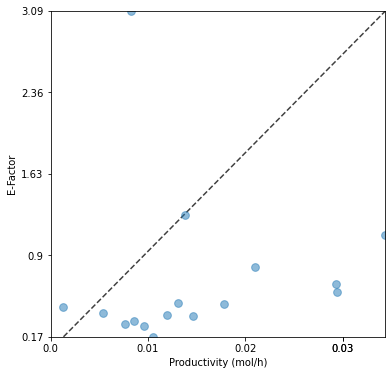

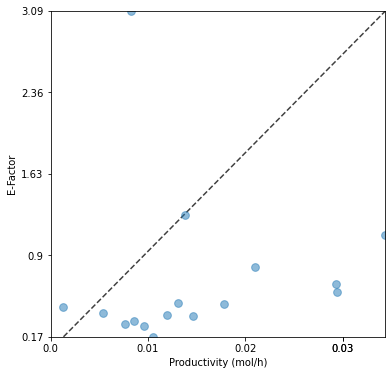

In [30]:
pareto_front(torch.tensor(x.values), 
             torch.tensor(y.values), 
             Y_names=['Productivity (mol/h)', 'E-Factor'], 
             fill=False)

In [31]:
a = ["a", "b", "c"]

In [33]:
a.index("b")

1

In [34]:
a[:2]

['a', 'b']